In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('Data-Preprocessed.csv')
df_preprocessed = raw_data.copy()
df_preprocessed.head()

,Unnamed: 0,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [5]:
df_preprocessed = df_preprocessed.drop(['Unnamed: 0'], axis = 1)
df_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [6]:
targets = df_preprocessed['log_price']
inputs = df_preprocessed.drop(['log_price'],axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [8]:
inputs_scaled = scaler.transform(inputs)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [13]:
y_hat = reg.predict(x_train)

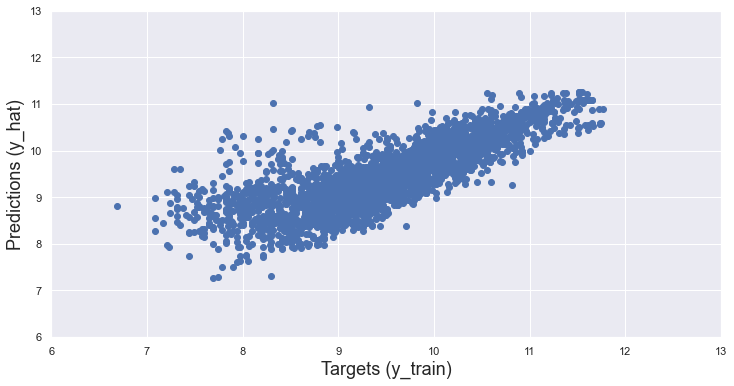

In [15]:
plt.figure(figsize = (12,6))
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

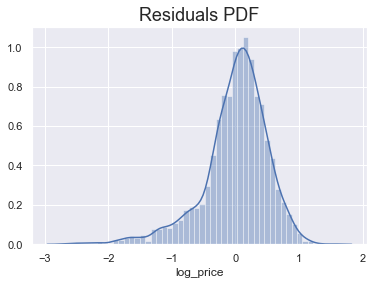

In [17]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [18]:
reg.score(x_train,y_train)

0.6453760625809728

In [19]:
reg.intercept_

9.423114047847008

In [20]:
reg.coef_

array([-0.53816664,  0.22649969,  0.01133908,  0.03920558, -0.12175132,
       -0.14285257, -0.03314042, -0.05768772, -0.1580312 , -0.09522218,
       -0.20117615, -0.14764365, -0.12618579, -0.06489732, -0.01495748,
       -0.09249632])

In [21]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.538167
1,EngineV,0.226500
2,Brand_BMW,0.011339
3,Brand_Mercedes-Benz,0.039206
4,Brand_Mitsubishi,-0.121751
5,Brand_Renault,-0.142853
6,Brand_Toyota,-0.033140
7,Brand_Volkswagen,-0.057688
8,Body_hatch,-0.158031
9,Body_other,-0.095222


In [22]:
y_hat_test = reg.predict(x_test)

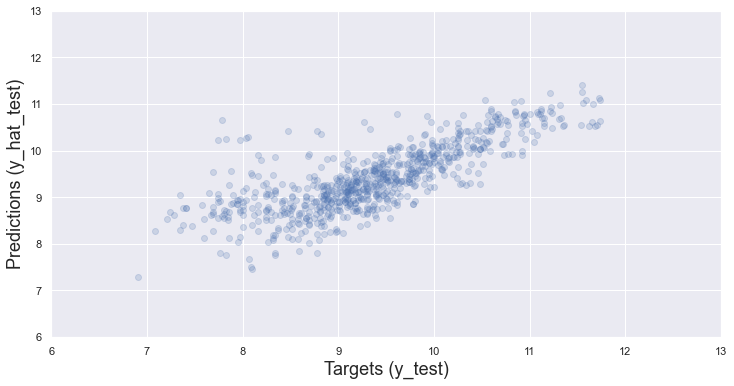

In [23]:
plt.figure(figsize = (12,6))
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [26]:
df_exp = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_exp.head()

,Prediction
0,40898.076950
1,7907.876306
2,13499.656453
3,10293.739894
4,5546.925203


In [27]:
df_exp['Target'] = np.exp(y_test)
df_exp

,Prediction,Target
0,40898.076950,4200.0
1,7907.876306,NaN
2,13499.656453,NaN
3,10293.739894,NaN
4,5546.925203,NaN
...,...,...
769,9551.584471,NaN
770,9075.105380,NaN
771,4462.588347,NaN
772,19179.946655,NaN


In [28]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.966462
1    9.093807
2    8.086410
3    9.392662
4    8.594154
Name: log_price, dtype: float64

In [30]:
df_exp['Target'] = np.exp(y_test)
df_exp

,Prediction,Target
0,40898.076950,21300.0
1,7907.876306,8900.0
2,13499.656453,3250.0
3,10293.739894,12000.0
4,5546.925203,5400.0
...,...,...
769,9551.584471,4200.0
770,9075.105380,8800.0
771,4462.588347,4850.0
772,19179.946655,27000.0


In [33]:
df_exp['Residual'] = df_exp['Target'] - df_exp['Prediction']
df_exp['Difference%'] = np.absolute(df_exp['Residual']/df_exp['Target']*100)
df_exp

,Prediction,Target,Residual,Difference%
0,40898.076950,21300.0,-19598.076950,92.009751
1,7907.876306,8900.0,992.123694,11.147457
2,13499.656453,3250.0,-10249.656453,315.374045
3,10293.739894,12000.0,1706.260106,14.218834
4,5546.925203,5400.0,-146.925203,2.720837
...,...,...,...,...
769,9551.584471,4200.0,-5351.584471,127.418678
770,9075.105380,8800.0,-275.105380,3.126198
771,4462.588347,4850.0,387.411653,7.987869
772,19179.946655,27000.0,7820.053345,28.963161


In [34]:
df_exp.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15746.382174,17799.988992,2053.606818,55.813667
std,12913.132360,19723.434542,11751.742314,115.446783
min,1457.413107,999.000000,-40300.077502,0.086925
25%,7294.802011,6700.000000,-2755.241295,12.718006
50%,11072.870540,11050.000000,387.378243,27.857472
75%,19668.614784,20475.000000,3987.846895,50.270232
max,89971.095783,125000.000000,83717.776759,1679.169896


In [37]:
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_exp.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
399,9408.17,9400.00,-8.17,0.09
169,6711.96,6700.00,-11.96,0.18
224,10831.66,10800.00,-31.66,0.29
122,9638.95,9599.00,-39.95,0.42
149,16646.29,16555.00,-91.29,0.55
727,8300.23,8350.00,49.77,0.60
468,6643.38,6600.00,-43.38,0.66
213,51152.89,51500.00,347.11,0.67
126,23836.29,24000.00,163.71,0.68
24,18863.41,19000.00,136.59,0.72
